In [3]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import mplhep
from mplhep import *
linestyle_str = [
('solid', 'solid'), # Same as (0, ()) or '-'
('dotted', '.'),# Same as (0, (1, 1)) or '.'
('dashed', '--'),   # Same as '--'
('dashdot', '-.')]  # Same as '-.'
from matplotlib.pyplot import *
import matplotlib as mpl
plt.rc('text', usetex=True)
plt.rc('font', family='Times New Roman')
from  matplotlib import *
mpl.rcParams['figure.figsize'] = (10,6)
import sympy as sy
sy.init_printing()
from sympy import *
%matplotlib inline

In [9]:
MSd, Mh, MZ, cw, MW, alpha, Ca, Sa= sy.symbols('MSd Mh MZ cw MW alpha Ca Sa', real=True)
vev, ytau,yup,ydo, ys = sy.symbols('vev ytau yup ydo ys', real=True)
yb, ye, ym, yc, yt, ee, gsd, gq, ychi, gchi, X= sy.symbols('yb ye ym yc yt ee gsd gq ychi gchi X', real=True)
gZp = 1 
gsd = -2*gchi
gchi, MZp, gq, Me, MMU, MTA, MU, MC, MT, MD, MS, MB, Mchi, Mq, MZp, vev2= sy.symbols('gchi MZp gq ME MMU Mta Mu Mc Mt Md MS Mb Mchi Mq MZp vev2', real=True)
yd1x1, yd2x2, yd3x3, vev2, lam1, lam2, lam3 = sy.symbols('yd1x1 yd2x2 yd3x3 vev2 lam1 lam2 lam3', real=True)
MW = 80.4
MZ = 91.2
vev = 246
sw = sy.sqrt(1-cw**2)
yc = np.sqrt(2)*MC/vev
yt = np.sqrt(2)*MT/vev
ydo = np.sqrt(2)*MD/vev
ys = np.sqrt(2)*MS/vev
yup = np.sqrt(2)*MU/vev
yb = np.sqrt(2)*MB/vev
MTA = 1.777
ytau = MTA*sy.sqrt(2)/vev
cw = MW/MZ
ee = (2*MW*sw)/vev
#Ca = sy.sqrt(1-Sa**2)
#mu2h = -(lam1*vev**2) - (lam3*vev2**2)/2
#mu2Sd = (lam3*vev**2)/2. + lam2*vev2**2
gqA =0
vev2 = MZp/(2*gchi)
Ca = sy.sqrt(1-Sa**2)


In [10]:
def Sdchichi(MSd, Mchi, ychi, Sa):
    Ca = sy.sqrt(1-Sa**2)
    return simplify(simplify(  ((-(Ca**2*Mchi**2*ychi**2) + (Ca**2*MSd**2*ychi**2)/4.)*sy.sqrt(-4*Mchi**2*MSd**2 + MSd**4))/(32*sy.pi*MSd**3)
                              ).subs(Mchi**2, X *MSd**2)).subs(X, Mchi**2 /MSd**2)
#def Sddd(MSd, Sa):
#    return simplify(simplify(   ).subs(MD**2, X *MSd**2)).subs(X, MD**2 /MSd**2)
#def Sdss(MSd, Sa):
#    return simplify(simplify(  ).subs(MS**2, X *MSd**2)).subs(X, MS**2 /MSd**2)
#def Sdbb(MSd, Sa):
#    return simplify(simplify(  ).subs(MB**2, X *MSd**2)).subs(X, MB**2 /MSd**2)                    
#def Sdee(MSd, Sa):
#    return simplify(simplify(  ).subs(Me**2, X *MSd**2)).subs(X, Me**2 /MSd**2)
#def Sdmumu(MSd, Sa):
#    return simplify(simplify(  ).subs(MMU**2, X *MSd**2)).subs(X, MMU**2 /MSd**2)
def Sdtata(MSd, Sa):
    return simplify(simplify(  ((MSd**2*Sa**2*ytau**2 - 4*MTA**2*Sa**2*ytau**2)*sy.sqrt(MSd**4 - 4*MSd**2*MTA**2))/(16*sy.pi*MSd**3)
                             ).subs(MTA**2, X *MSd**2)).subs(X, MTA**2 /MSd**2)
#def Sduu(MSd,Sa):
#    return simplify(simplify(  ).subs(MU**2, X *MSd**2)).subs(X, MU**2 /MSd**2)
#def Sdcc(MSd,Sa):
#    return simplify(simplify( ).subs(MC**2, X *MSd**2)).subs(X, MC**2 /MSd**2)
def Sdtt(MSd, Sa):
    return simplify(simplify( ((3*MSd**2*Sa**2*yt**2 - 12*MT**2*Sa**2*yt**2)*sy.sqrt(MSd**4 - 4*MSd**2*MT**2))/(16*sy.pi*MSd**3)
                              ).subs(MT**2, X *MSd**2)).subs(X, MT**2 /MSd**2)
def SdWW(MSd, Sa):
    ee = (2*MW*sw)/vev
    return simplify(simplify( (((3*ee**4*Sa**2*vev**2)/(4*sw**4) + (ee**4*MSd**4*Sa**2*vev**2)/(16*MW**4*sw**4) - (ee**4*MSd**2*Sa**2*vev**2)/(4*MW**2*sw**4))*sy.sqrt(MSd**4 - 4*MSd**2*MW**2))/(16*sy.pi*MSd**3)
                             ).subs(MW**2, X *MSd**2)).subs(X, MW**2 /MSd**2)
def SdZZ(MSd, Sa):
    ee = (2*MW*sw)/vev
    return simplify(simplify( (((9*ee**4*Sa**2*vev**2)/2. + (3*ee**4*MSd**4*Sa**2*vev**2)/(8*MZ**4) - (3*ee**4*MSd**2*Sa**2*vev**2)/(2*MZ**2) + (3*cw**4*ee**4*Sa**2*vev**2)/(4*sw**4) + (cw**4*ee**4*MSd**4*Sa**2*vev**2)/(16*MZ**4*sw**4) - (cw**4*ee**4*MSd**2*Sa**2*vev**2)/(4*MZ**2*sw**4) + (3*cw**2*ee**4*Sa**2*vev**2)/sw**2 + (cw**2*ee**4*MSd**4*Sa**2*vev**2)/(4*MZ**4*sw**2) - (cw**2*ee**4*MSd**2*Sa**2*vev**2)/(MZ**2*sw**2) + (3*ee**4*Sa**2*sw**2*vev**2)/cw**2 + (ee**4*MSd**4*Sa**2*sw**2*vev**2)/(4*cw**2*MZ**4) - (ee**4*MSd**2*Sa**2*sw**2*vev**2)/(cw**2*MZ**2) + (3*ee**4*Sa**2*sw**4*vev**2)/(4*cw**4) + (ee**4*MSd**4*Sa**2*sw**4*vev**2)/(16*cw**4*MZ**4) - (ee**4*MSd**2*Sa**2*sw**4*vev**2)/(4*cw**4*MZ**2))*sy.sqrt(MSd**4 - 4*MSd**2*MZ**2))/(32*sy.pi*MSd**3)
                              ).subs(MZ**2, X *MSd**2)).subs(X, MZ**2 /MSd**2)
def Sdhh(MSd, Sa, MZp, gchi):
    #Ca = cos(alpha)
    #Sa = sin(alpha)
    lam1 = (Ca**2*Mh**2)/(2*vev**2) + (MSd**2*Sa**2)/(2*vev**2)
    lam2 = (Ca**2*MSd**2)/(2*vev2**2) + (Mh**2*Sa**2)/(2*vev2**2)
    lam3 = (Ca*(-Mh**2 + MSd**2)*Sa)/(vev*vev2)
    return simplify(simplify( #((36*Ca**4*lam1**2*Sa**2*vev**2 - 24*Ca**4*lam1*lam3*Sa**2*vev**2 + 4*Ca**4*lam3**2*Sa**2*vev**2 + 12*Ca**2*lam1*lam3*Sa**4*vev**2 - 4*Ca**2*lam3**2*Sa**4*vev**2 + lam3**2*Sa**6*vev**2 - 12*Ca**5*lam1*lam3*Sa*vev*vev2 + 4*Ca**5*lam3**2*Sa*vev*vev2 - 72*Ca**3*lam1*lam2*Sa**3*vev*vev2 + 24*Ca**3*lam1*lam3*Sa**3*vev*vev2 + 24*Ca**3*lam2*lam3*Sa**3*vev*vev2 - 10*Ca**3*lam3**2*Sa**3*vev*vev2 - 12*Ca*lam2*lam3*Sa**5*vev*vev2 + 4*Ca*lam3**2*Sa**5*vev*vev2 + Ca**6*lam3**2*vev2**2 + 12*Ca**4*lam2*lam3*Sa**2*vev2**2 - 4*Ca**4*lam3**2*Sa**2*vev2**2 + 36*Ca**2*lam2**2*Sa**4*vev2**2 - 24*Ca**2*lam2*lam3*Sa**4*vev2**2 + 4*Ca**2*lam3**2*Sa**4*vev2**2)*sy.sqrt(-4*Mh**2*MSd**2 + MSd**4))/(32*sy.pi*MSd**3)
                             ((36*Ca**4*lam1**2*Sa**2*vev**2 - 24*Ca**4*lam1*lam3*Sa**2*vev**2 + 4*Ca**4*lam3**2*Sa**2*vev**2 + 12*Ca**2*lam1*lam3*Sa**4*vev**2 - 4*Ca**2*lam3**2*Sa**4*vev**2 + lam3**2*Sa**6*vev**2 + 12*Ca**5*lam1*lam3*Sa*vev*vev2 - 4*Ca**5*lam3**2*Sa*vev*vev2 + 72*Ca**3*lam1*lam2*Sa**3*vev*vev2 - 24*Ca**3*lam1*lam3*Sa**3*vev*vev2 - 24*Ca**3*lam2*lam3*Sa**3*vev*vev2 + 10*Ca**3*lam3**2*Sa**3*vev*vev2 + 12*Ca*lam2*lam3*Sa**5*vev*vev2 - 4*Ca*lam3**2*Sa**5*vev*vev2 + Ca**6*lam3**2*vev2**2 + 12*Ca**4*lam2*lam3*Sa**2*vev2**2 - 4*Ca**4*lam3**2*Sa**2*vev2**2 + 36*Ca**2*lam2**2*Sa**4*vev2**2 - 24*Ca**2*lam2*lam3*Sa**4*vev2**2 + 4*Ca**2*lam3**2*Sa**4*vev2**2)*sy.sqrt(-4*Mh**2*MSd**2 + MSd**4))/(32*sy.pi*MSd**3)
                               ).subs(Mh**2, X *MSd**2)).subs(X, Mh**2 /MSd**2)
def Sdqq(MSd,Sa):
#    return (MSd,uu(MSd, Sa) + Sdcc(MSd,Sa) + Sdtt(MSd, Sa) + Sddd(MSd, Sa) + Sdss(MSd, Sa) + Sdbb(MSd, Sa))
    return (Sdtata(MSd, Sa))
def Sdallall(MSd, Mchi, Sa,ychi):
    #return Sdqq(MSd, Sa) + Sdchichi(MSd, Mchi, ychi, Sa) + SdWW(MSd, Sa) + SdZZ(MSd, Sa) + Sdee(MSd, Sa) + Sdmumu(MSd, Sa) + Sdtata(MSd, Sa) + Sdhh(MSd, Sa, gchi, MZp)
    return (Sdtt(MSd, Sa) + Sdtata(MSd, Sa) + SdWW(MSd, Sa) + SdZZ(MSd, Sa) + Sdhh(MSd, Sa, MZp, gchi) +Sdchichi(MSd, Mchi, ychi, Sa) )
# BRs
def BR_Sd_qq(MSd, Mchi, Sa, ychi):
    return Sdqq(MSd, Sa) / Sdallall(MSd, Mchi, Sa,ychi) 

def BR_Sd_xx(MSd, Mchi, Sa,ychi):
    return Sdchichi(MSd, Mchi, Sa, ychi) / Sdallall(MSd, Mchi, Sa,ychi)


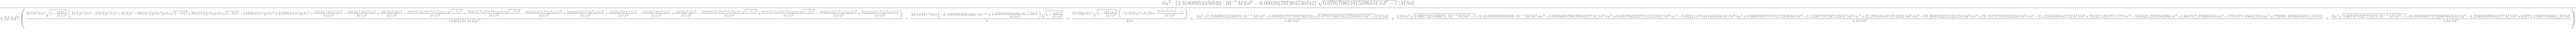

In [11]:
#Sdchichi(MSd, Mchi, ychi, Sa)
#SdZZ(MSd, Sa)
#SdWW(MSd, Sa)
#Sdhh(MSd, Sa, MZp, gchi)
BR_Sd_qq(MSd, Mchi, Sa, ychi)

In [7]:
print(r'\Gamma(s_d \to \tau \tau )= ', latex(Sdtata(MSd, Sa)))
#print(r'\Gamma(s_d \to \mu \mu )= ', latex(Sdmumu(MSd, Sa)))
#print(r'\Gamma(s_d \to e e )= ', latex(Sdee(MSd, Sa)))
#print(r'\Gamma(s_d \to s s )= ', latex(Sdss(MSd, Sa)))
#print(r'\Gamma(s_d \to d d )= ', latex(Sddd(MSd, Sa)))
#print(r'\Gamma(s_d \to u u )= ', latex(Sduu(MSd, Sa)))
#print(r'\Gamma(s_d \to c c )= ', latex(Sdcc(MSd, Sa)))
print(r'\Gamma(s_d \to t t )= ', latex(Sdtt(MSd, Sa)))
#print(r'\Gamma(s_d \to b b )= ', latex(Sdbb(MSd, Sa)))
print(r'\Gamma(s_d \to W W )= ', latex(SdWW(MSd, Sa)))
print(r'\Gamma(s_d \to Z Z )= ', latex(SdZZ(MSd, Sa)))
print(r'\Gamma(s_d \to x x )= ', latex(Sdchichi(MSd, Mchi, ychi, Sa)))
print(r'\Gamma(s_d \to h h )= ', latex(Sdhh(MSd, Sa, MZp, gchi)))


\Gamma(s_d \to \tau \tau )=  \frac{MSd Sa^{2} ytau^{2} \left(1 - \frac{4 Mta^{2}}{MSd^{2}}\right)^{\frac{3}{2}}}{16 \pi}
\Gamma(s_d \to t t )=  - \frac{MSd Mt^{2} Sa^{2} \left(-6.1967083085465 \cdot 10^{-6} + \frac{2.4786833234186 \cdot 10^{-5} Mt^{2}}{MSd^{2}}\right) \sqrt{1 - \frac{4 Mt^{2}}{MSd^{2}}}}{\pi}
\Gamma(s_d \to W W )=  \frac{Sa^{2} \sqrt{3.86747852775921 \cdot 10^{-5} MSd^{2} - 1} \cdot \left(0.000166071782669046 MSd^{4} - 4.29405829863177 MSd^{2} + 83272.4396750506\right) \left|{MSd}\right|}{\pi MSd^{3}}
\Gamma(s_d \to Z Z )=  \frac{1.0 Sa^{2} \sqrt{3.0057325330871 \cdot 10^{-5} MSd^{2} - 1} \cdot \left(9.41899662899068 \cdot 10^{-5} MSd^{4} cw^{8} - 0.000669570639865577 MSd^{4} cw^{6} + 0.00178492277135219 MSd^{4} cw^{4} - 0.00211475441458105 MSd^{4} cw^{2} + 0.000939575574172198 MSd^{4} - 3.13367757287329 MSd^{2} cw^{8} + 22.2764544913742 MSd^{2} cw^{6} - 59.3839522214221 MSd^{2} cw^{4} + 70.357371832052 MSd^{2} cw^{2} - 31.2594538545712 MSd^{2} + 78192.5255751577 cw^{8

In [13]:
MZp = 2000
Mchi = 140
Sa_values = [0.005,0.05, 0.1, 0.5]
MU = 0.00255
MC = 1.27
MT = 172
MD = 0.00504
MS = 0.101
MB = 4.7
ychi =1
Mh = 125
MSd_values = list(range(500, 4000, 500))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


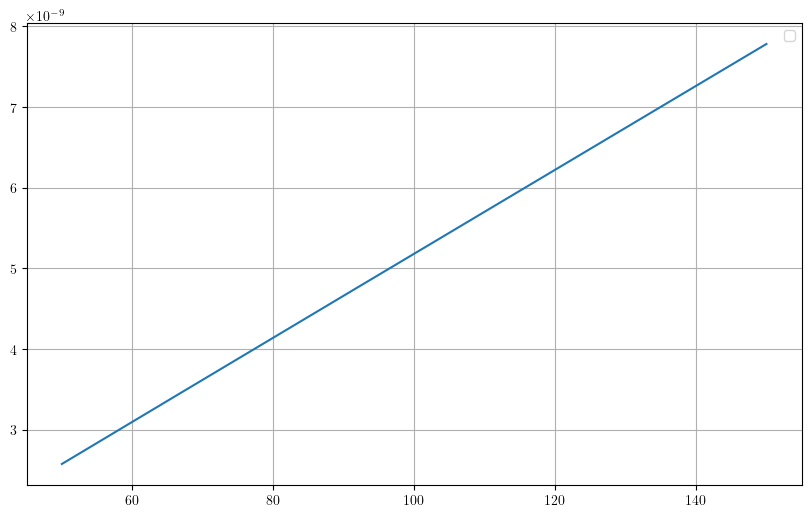

In [19]:
from sympy import lambdify
func = lambdify(MSd, Sdqq(MSd, Sa_values[0]))
MSd_vals = np.linspace(50, 150, 400)
y_vals = [func(val) for val in MSd_vals]
plt.plot(MSd_vals, y_vals)

plt.legend()
plt.grid(True)
plt.show()
